In [19]:
from specim_test.specim.specfuncs import spec2d
from astropy.io import fits as pf
import numpy as np
import matplotlib.pyplot as plt
from specim.specfuncs import spec1d
import glob

In [2]:
infile = 'B0445_r0033_cleaned.fits'

In [3]:
spec = spec2d.Spec2d(infile, xtrim=[45, 160])       #, hext=12, xtrim=[30, 500])


Loading file B0445_r0033_cleaned.fits
-----------------------------------------------
Read in 2-dimensional spectrum from B0445_r0033_cleaned.fits (HDU=0)
The input dataset was trimmed
 xrange: 45:161.  yrange: 0:4096
Final data dimensions (x y): 116 x 4096

Dispersion axis:              x
N_pixels along dispersion axis: 116



In [4]:
spec.set_dispaxis('y')


Old value of dispaxis: x

Dispersion axis:              y
N_pixels along dispersion axis: 4096




In [ ]:
#spec.subtract_sky_2d(outfile='sky_subtracted_using_pypeit_B0445_29.fits', use_skymod=True)
#spec.szap(use_skymod=True, outfile='B0445_29_szapeed.fits')  

In [ ]:
#%matplotlib notebook
#spec.display_spec(use_skymod=True, doszap=True)

Dispersion : 0.800000
Found 180 NaNs in the two-dimensional spectrum

sky subtracted and cosmic ray rejected data has been resampled in place of the coordinateds whcih rectify the tilted wave image


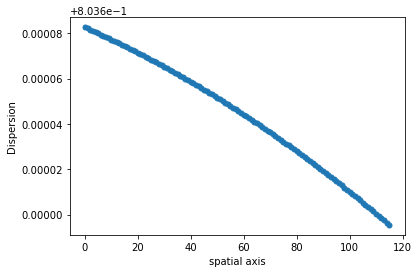

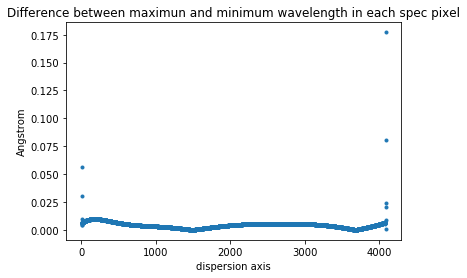

In [5]:
spec.do_waverect(doplot=True)

Profile max value (before normalization) 25.068409


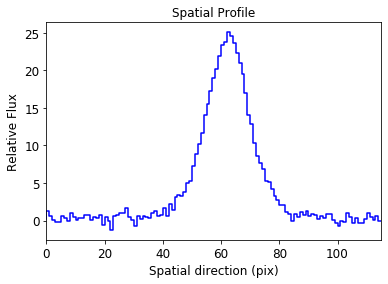

In [6]:
profile = spec.spatial_profile(pixrange=[1600, 3200])


To create an initial model you first need to enter degree of background polynomial(<3) and number of Gaussian and Moffat profile as integers.
Order of background polynomial : 0
Number of Gaussian profile : 1
Number of Moffat profile : 0

Now enter constants of the background polynomial upto degree 0
c0 : 2

Enter parameter values for a Gaussian profile in following format...
amplitude_value, mu_value, sigma_value

Parameters of Gaussian profile 1 : 25, 63, 5

amplitude=25.000000, mu=63.000000, sigma=5.000000

Fitted model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1]
Components: 
    [0]: <Polynomial1D(0, c0=0.47542559)>

    [1]: <Gaussian1D(amplitude=23.49566633, mean=62.83960228, stddev=7.4316134)>
Parameters:
            c0_0           amplitude_1           mean_1           stddev_1    
    ------------------- ------------------ ----------------- -----------------
    0.47542559333822065 23.495666332885268 62.839602279991

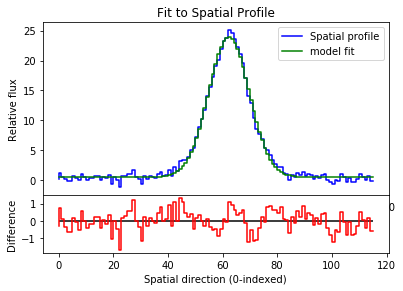

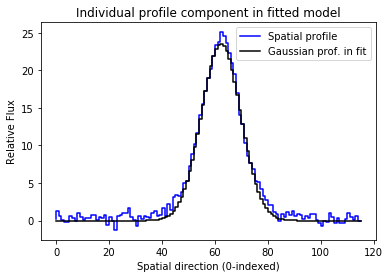

In [7]:
mod = spec.initial_model()

In [ ]:
#mod[1].stddev.bounds = (0, 8.5)

In [ ]:
#mod_new = spec.refined_model(mod)


Running fit_trace
---------------------------------------------------------
Fitting to the trace at 163 segments
  of the 2D spectrum with stepsize=25 pix ...
    Done
Fitting polynomial of degree 3 to parameter: c0_0
Fitting polynomial of degree 3 to parameter: mean_1
Fitting polynomial of degree 3 to parameter: stddev_1


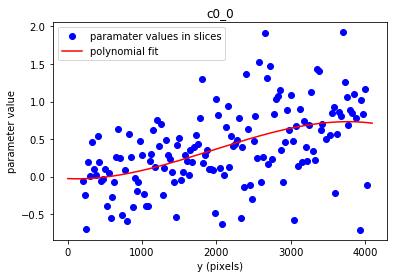

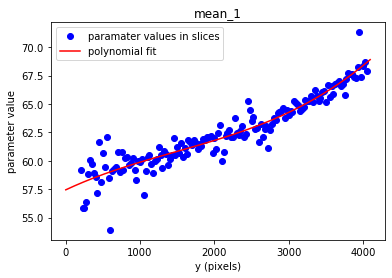

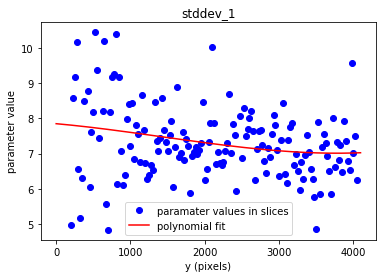

In [10]:
spec.find_and_trace(mod, stepsize=25, fitorder={'stddev_1':3, 'stddev_2':3, 'gamma_2':3, 'alpha_2':3},
                    fitrange=[200,4100])  

Fitting to 1 components, plus a background
Extracting the spectrum.  Please be patient
 Extraction range (pixels): 0 - 4096
Fitting to the trace at 4096 segments
  of the 2D spectrum with stepsize=1 pix ...
 Spectrum Start:  5651.23
 Spectrum End:     8927.26
 Dispersion (1st pixel):   0.80
 Dispersion (average):      0.80


Plotting the spectrum


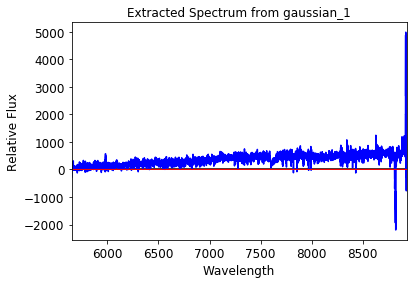

In [11]:
spec.extract(method='modelfit')

In [12]:
wav = spec.spectra[0][1]['wav']
flux = spec.spectra[0][1]['flux']

In [13]:
spec1 = spec1d.Spec1d(wav=wav[0:3930], flux=flux[0:3930])

 Spectrum Start:  5651.23
 Spectrum End:     8794.46
 Dispersion (1st pixel):   0.80
 Dispersion (average):      0.80



<IPython.core.display.Javascript object>


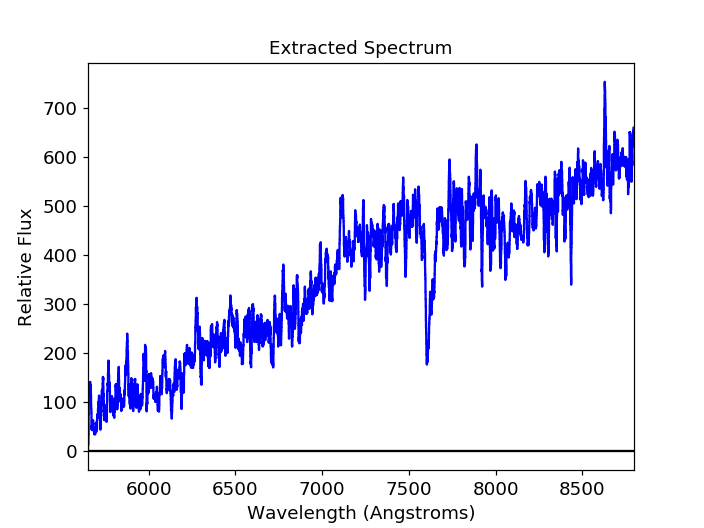

In [14]:
%matplotlib notebook
spec1.smooth(11)

In [15]:
spec.spectra[0][1].save('spec1d_B0445_r0033.fits', outformat='fits')

Saved spectrum to file spec1d_B0445_r0033.fits in format fits


In [16]:
sp = spec1d.Spec1d('spec1d_B0445_r0033.fits', informat='fits', trimsec=[0, 3930])


Reading spectrum from spec1d_B0445_r0033.fits
Expected file format: fits
 Spectrum Start:  5651.23
 Spectrum End:     8794.46
 Dispersion (1st pixel):   0.80
 Dispersion (average):      0.80



<IPython.core.display.Javascript object>


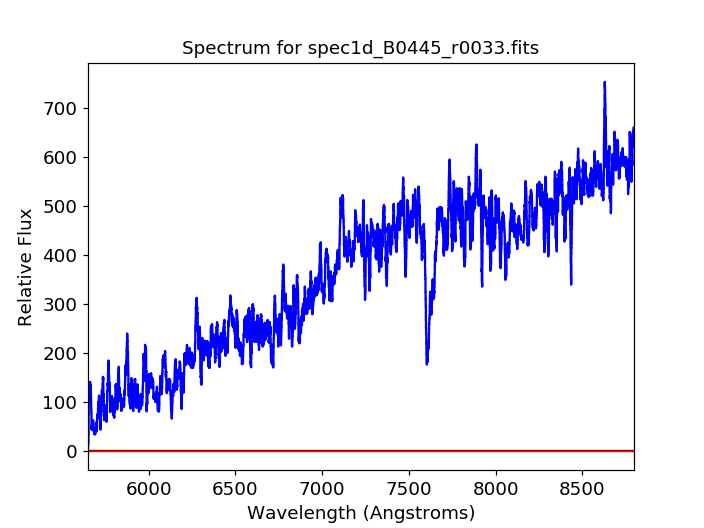

In [17]:
sp.smooth(11)

In [18]:
spec_coadd = spec1d.Spec1d('spec1d_B0445_r0029.fits', informat='fits')


Reading spectrum from spec1d_B0445_r0029.fits
Expected file format: fits
 Spectrum Start:  5650.55
 Spectrum End:     8926.58
 Dispersion (1st pixel):   0.80
 Dispersion (average):      0.80



In [23]:
flag = 1
for i,p in enumerate(glob.glob('*')):
    if 'spec1d' in p:
        print(p)
        if flag :
            spec_coadd = spec1d.Spec1d(p, informat='fits', trimsec=[0, 3930])
            flag = 0 
            k = 0
        else:
            sp = spec1d.Spec1d(p, informat='fits', trimsec=[0, 3930])
            k = k+1
        if k:    
            spec_coadd = spec_coadd.__add__(sp)

spec1d_B0445_r0030.fits

Reading spectrum from spec1d_B0445_r0030.fits
Expected file format: fits
 Spectrum Start:  5651.17
 Spectrum End:     8794.39
 Dispersion (1st pixel):   0.80
 Dispersion (average):      0.80

spec1d_B0445_r0031.fits

Reading spectrum from spec1d_B0445_r0031.fits
Expected file format: fits
 Spectrum Start:  5651.67
 Spectrum End:     8794.89
 Dispersion (1st pixel):   0.80
 Dispersion (average):      0.80

 Spectrum Start:  5651.17
 Spectrum End:     8794.39
 Dispersion (1st pixel):   0.80
 Dispersion (average):      0.80

spec1d_B0445_r0033.fits

Reading spectrum from spec1d_B0445_r0033.fits
Expected file format: fits
 Spectrum Start:  5651.23
 Spectrum End:     8794.46
 Dispersion (1st pixel):   0.80
 Dispersion (average):      0.80

 Spectrum Start:  5651.17
 Spectrum End:     8794.39
 Dispersion (1st pixel):   0.80
 Dispersion (average):      0.80

spec1d_B0445_r0032.fits

Reading spectrum from spec1d_B0445_r0032.fits
Expected file format: fits
 Spectrum Sta

<IPython.core.display.Javascript object>


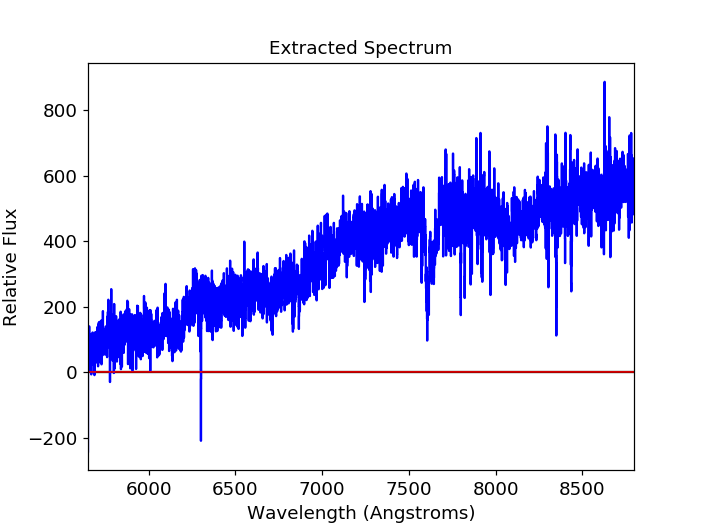

<IPython.core.display.Javascript object>


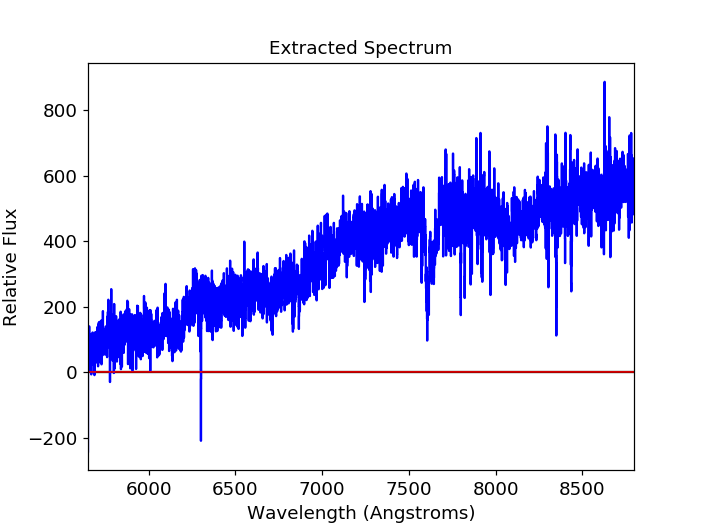

In [24]:
spec_coadd.plot()

<IPython.core.display.Javascript object>


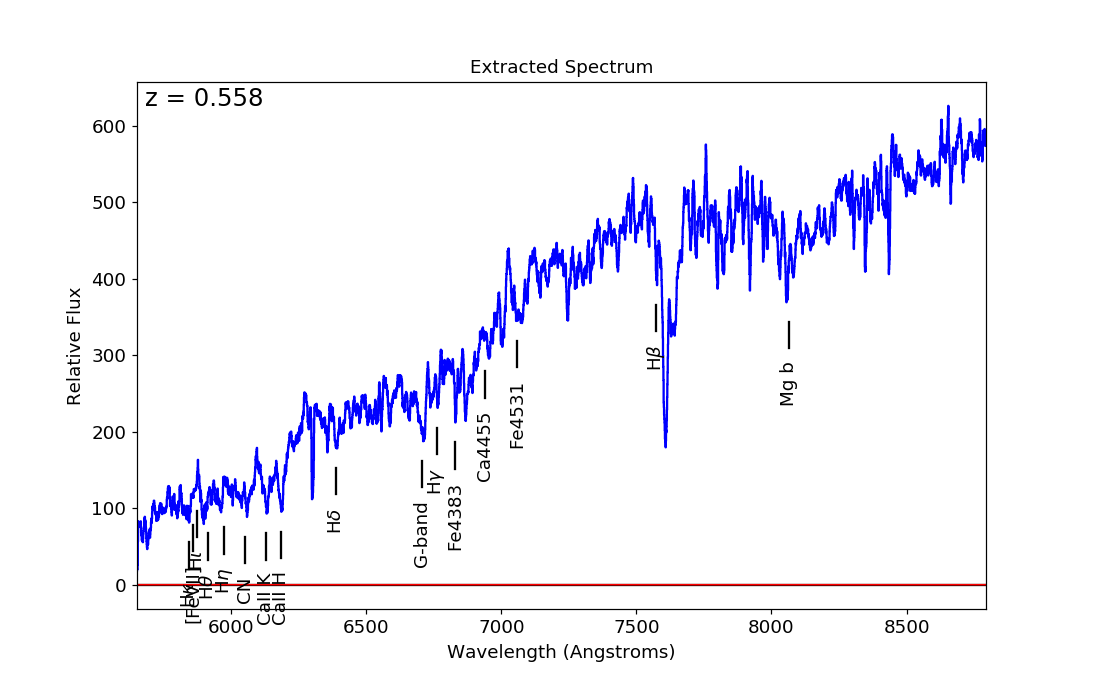


Line        lambda_rest  lambda_obs
----------  -----------  -----------
H-kappa       3750.00       5842.50
[Fe VII]      3761.40       5860.26
H-iota        3770.00       5873.66
H-theta       3797.00       5915.73
H-eta         3835.00       5974.93
CN bandhd     3883.00       6049.71
CaII K        3933.67       6128.66
CaII H        3968.47       6182.88
H-delta       4101.00       6389.36
G-band        4305.00       6707.19
H-gamma       4340.00       6761.72
Fe4383        4383.00       6828.71
Ca4455        4455.00       6940.89
Fe4531        4531.00       7059.30
H-beta        4861.00       7573.44
Mg I (b)      5176.00       8064.21



In [27]:
spec_coadd.smooth(11)
spec_coadd.mark_lines('abs', z=0.558, usesmooth=True)